In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pickle
import pandas as pd

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    print(e)

---

In [4]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [5]:
print(type(x_train), x_train.shape)
print(np.min(x_train), np.max(x_train))


<class 'numpy.ndarray'> (50000, 32, 32, 3)
0.0 1.0




---



### Task 1

Implement a CNN with the following structure:
- 4 Conv layers:  
(3x3)x32, (3x3)x32, (3x3)x64, (3x3)x64

- Maxpool after 2nd and 4th conv.
- Dropout after pooling
- One FC layer and then a FC output layer

Train the CNN model until training accuracy converges. (**fit** function returns a History object.
Plot "History.history['accuracy']" to visually exam convergence.)
After training, test the model's performance on the test data.

In [8]:
#1st part: model creation and construction

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same',input_shape=x_train.shape[1:])) #1st Conv w/ inputs
model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')) #2nd Conv

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) #1st max_pool
model.add(tf.keras.layers.Dropout(0.2))#dropout layer

model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')) #3rd Conv
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')) #4th Conv

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2))) #2nd max_pool
model.add(tf.keras.layers.Dropout(0.2))#dropout layer

model.add(tf.keras.layers.Flatten()) #flatten layer before Fully-Connected (FC), or Dense, layer.

model.add(tf.keras.layers.Dense(128,activation='relu')) #FC layer

model.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model.summary())

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________

In [9]:
# 2nd part: model training 
history=model.fit(x_train, y_train, epochs=50, batch_size=32)

Train on 50000 samples
Epoch 1/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 1.4589 - acc: 0.4739
Epoch 2/50
50000/50000 [==============================] - 95s 2ms/sample - loss: 1.0105 - acc: 0.6437
Epoch 3/50
50000/50000 [==============================] - 95s 2ms/sample - loss: 0.8558 - acc: 0.6989
Epoch 4/50
50000/50000 [==============================] - 97s 2ms/sample - loss: 0.7507 - acc: 0.7355
Epoch 5/50
50000/50000 [==============================] - 102s 2ms/sample - loss: 0.6882 - acc: 0.7569
Epoch 6/50
50000/50000 [==============================] - 100s 2ms/sample - loss: 0.6305 - acc: 0.7753
Epoch 7/50
50000/50000 [==============================] - 103s 2ms/sample - loss: 0.5780 - acc: 0.7961
Epoch 8/50
50000/50000 [==============================] - 104s 2ms/sample - loss: 0.5323 - acc: 0.8106
Epoch 9/50
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.4958 - acc: 0.8243
Epoch 10/50
50000/50000 [==============================

Text(0, 0.5, 'Training Accuracy, %')

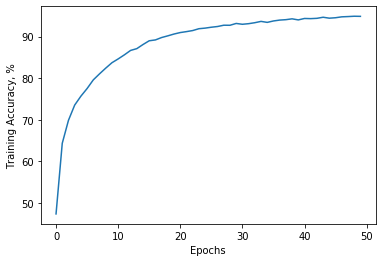

In [59]:
#Plotting model accuracy on training data as a function of epochs
plt.plot(np.array(history.history['acc'])*100)
plt.xlabel(r'Epochs')
plt.ylabel(r'Training Accuracy, %')

In [8]:
#3rd part: model validation on test data
scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/1 - 2s - loss: 1.5746 - accuracy: 0.7660
Test loss: 1.217241884469986
Test accuracy: 76.5999972820282


Text(0, 0.5, 'Training Accuracy, %')

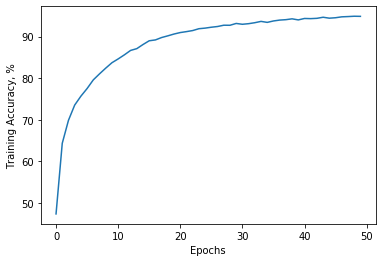

In [9]:
#Use this section to load the model, instead of running the training from the beginning

model = tf.keras.models.load_model('saved_models/Model_Task1')
df1 = pd.read_pickle('task1.pickle')
plt.plot(np.array(df1['acc'])*100)
plt.xlabel(r'Epochs')
plt.ylabel(r'Training Accuracy, %')

In [17]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_Task1'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ahass16\Desktop\LSU\Spring 2020\Applied Deep Learning\Lab 2\saved_models\Model_Task1 


### Task 2
As comparason, implement a regular NN:
- 4 FC layers: 512, 256, 256, 256 neurons
- Dropout after each FC layer
- A FC output layer

Train the CNN model until training accuracy converges. Test the model's performance on the test data.

In [41]:
#1st part: Model Initilization and Construction

model_2 = tf.keras.Sequential()

model_2.add(tf.keras.layers.Flatten(input_shape=x_train.shape[1:])) #flatten layer before Fully-Connected (FC), or Dense, layer.

model_2.add(tf.keras.layers.Dense(512,activation='relu')) #1st layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(256,activation='relu')) #2nd layer
model_2.add(tf.keras.layers.Dropout(0.2))#dropout layer

model_2.add(tf.keras.layers.Dense(10,activation='softmax')) #output layer

model_2.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_2.summary())



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)              

In [63]:
#2nd part: model training 
history_2=model_2.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.6726 - acc: 0.4006 - val_loss: 1.6134 - val_acc: 0.4298
Epoch 2/50
50000/50000 [==============================] - 13s 251us/sample - loss: 1.6698 - acc: 0.4013 - val_loss: 1.6602 - val_acc: 0.3996
Epoch 3/50
50000/50000 [==============================] - 13s 254us/sample - loss: 1.6725 - acc: 0.3987 - val_loss: 1.6121 - val_acc: 0.4173
Epoch 4/50
50000/50000 [==============================] - 13s 255us/sample - loss: 1.6703 - acc: 0.3984 - val_loss: 1.6150 - val_acc: 0.4277
Epoch 5/50
50000/50000 [==============================] - 13s 255us/sample - loss: 1.6667 - acc: 0.3974 - val_loss: 1.6168 - val_acc: 0.4224
Epoch 6/50
50000/50000 [==============================] - 13s 256us/sample - loss: 1.6781 - acc: 0.3987 - val_loss: 1.6012 - val_acc: 0.4329
Epoch 7/50
50000/50000 [==============================] - 13s 255us/sample - loss: 1.6701 - acc: 0.4002 

In [11]:
#3rd part: model validation on test data
scores = model_2.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/1 - 0s - loss: 1.5838 - accuracy: 0.4215
Test loss: 1.6057945205688477
Test accuracy: 42.14999973773956


Text(0, 0.5, 'Training Accuracy, %')

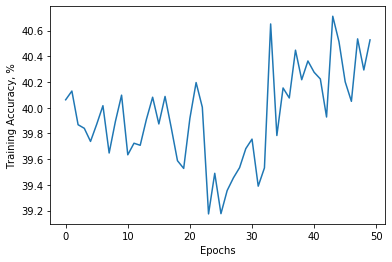

In [65]:
#Plotting model accuracy on training data as a function of epochs number

plt.plot(np.array(history_2.history['acc']) * 100)
plt.xlabel(r'Epochs')
plt.ylabel(r'Training Accuracy, %')

#You shall notice that training accuracy starts at 40% because I trained the model 3 consecutive times using 50 epochs.

Text(0, 0.5, 'Training Accuracy, %')

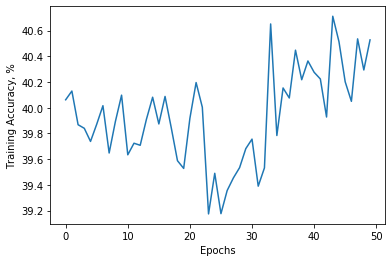

In [10]:
#Use this section to load the model, instead of running the training from the beginning

model_2 = tf.keras.models.load_model('saved_models/Model_Task2')
df1 = pd.read_pickle('task2.pickle')
plt.plot(np.array(df1['acc'])*100)
plt.xlabel(r'Epochs')
plt.ylabel(r'Training Accuracy, %')

In [66]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_Task2'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_2.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ahass16\Desktop\LSU\Spring 2020\Applied Deep Learning\Lab 2\saved_models\Model_Task2 


### Task 3
Re-implement the model in Task 1 using the **functional API**.

**fit** function takes a parameter "validation_data". You can pass the tuple x_test and y_test to that parameter. With this, the accuracy on the test data will be calculated each epoch, along with the training accuracy.  

Plot both the training and the test accuracy in one plot. Does the test accuracy always increase with the training accuracy? 

In [68]:
#1st part: model creation and construction

inputs = tf.keras.layers.Input(shape=x_train.shape[1:])

conv1 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(inputs)
conv2 = tf.keras.layers.Conv2D(32,(3,3),activation='relu',padding='same')(conv1)

pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
drop1= tf.keras.layers.Dropout(0.2)(pool1)

conv3 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(drop1)
conv4 = tf.keras.layers.Conv2D(64,(3,3),activation='relu',padding='same')(conv3)

pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv4)
drop2 = tf.keras.layers.Dropout(0.2)(pool2)

flatten = tf.keras.layers.Flatten()(drop2)

dense = tf.keras.layers.Dense(128,activation='relu')(flatten) 

output = tf.keras.layers.Dense(10,activation='softmax')(dense) #output layer

model_3 = tf.keras.models.Model(inputs=inputs, outputs=output)

model_3.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

print(model_3.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        3692

In [71]:
#Model Training 
history_3=model_3.fit(x_train, y_train, epochs=50, batch_size=32, validation_data = (x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 101s 2ms/sample - loss: 1.2843 - acc: 0.5371 - val_loss: 1.1709 - val_acc: 0.5825
Epoch 2/50
50000/50000 [==============================] - 99s 2ms/sample - loss: 0.9749 - acc: 0.6583 - val_loss: 0.9080 - val_acc: 0.6820
Epoch 3/50
50000/50000 [==============================] - 104s 2ms/sample - loss: 0.8321 - acc: 0.7081 - val_loss: 0.8256 - val_acc: 0.7116
Epoch 4/50
50000/50000 [==============================] - 96s 2ms/sample - loss: 0.7366 - acc: 0.7387 - val_loss: 0.7715 - val_acc: 0.7331
Epoch 5/50
50000/50000 [==============================] - 98s 2ms/sample - loss: 0.6596 - acc: 0.7671 - val_loss: 0.8052 - val_acc: 0.7279
Epoch 6/50
50000/50000 [==============================] - 94s 2ms/sample - loss: 0.6018 - acc: 0.7859 - val_loss: 0.7321 - val_acc: 0.7483
Epoch 7/50
50000/50000 [==============================] - 94s 2ms/sample - loss: 0.5495 - acc: 0.8048 - val_loss: 

In [13]:
#3rd part: model validation on test data
scores = model_3.evaluate(x_test, y_test, verbose=2)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1]*100)

10000/1 - 1s - loss: 1.8629 - accuracy: 0.7603
Test loss: 1.1849362686634064
Test accuracy: 76.02999806404114


Text(0, 0.5, 'Training Accuracy, %')

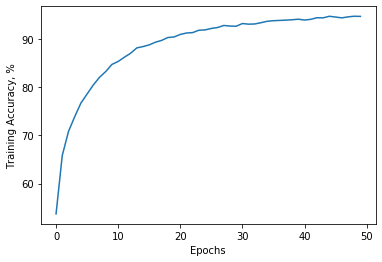

In [12]:
#Use this section to load the model, instead of running the training from the beginning

model_3 = tf.keras.models.load_model('saved_models/Model_Task3')
df1 = pd.read_pickle('task3.pickle')
plt.plot(np.array(df1['acc'])*100)
plt.xlabel(r'Epochs')
plt.ylabel(r'Training Accuracy, %')

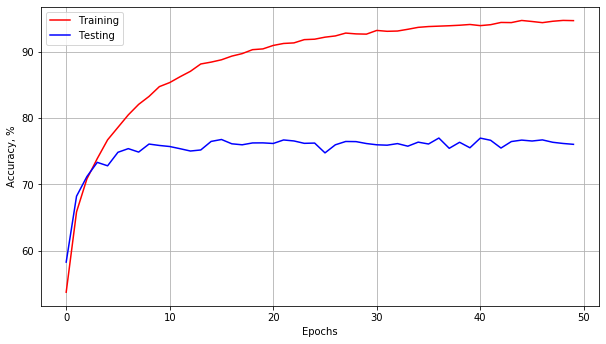

In [76]:
#Plotting model accuracy on training and testing data as a function of epochs number

plt.plot(np.array(history_3.history['acc']) * 100, label='Training',color='r')
plt.plot(np.array(history_3.history['val_acc']) * 100, label='Testing',color='b')
plt.xlabel(r'Epochs')
plt.ylabel(r'Accuracy, %')
plt.legend()
plt.grid( which='major', axis='both', )
fig = plt.gcf()
fig.set_size_inches(10, 5.5)
#Testing accuracy does NOT increase as Training accuracy increases as shown in the graph below.

In [78]:
# Save model and weights
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'Model_Task3'
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model_3.save(model_path)
print('Saved trained model at %s ' % model_path)

Saved trained model at C:\Users\ahass16\Desktop\LSU\Spring 2020\Applied Deep Learning\Lab 2\saved_models\Model_Task3 


In [81]:
import pickle
import pandas as pd

#The following saves values stored in model.fit into .pickle files

In [85]:
df1 = pd.DataFrame(history.history)
df1.to_pickle('task1.pickle')

In [93]:
df2 = pd.DataFrame(history_2.history)
df2.to_pickle('task2.pickle')

In [94]:
df3 = pd.DataFrame(history_3.history)
df3.to_pickle('task3.pickle')